importing the libraries

In [1]:
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import random as rn
from functools import reduce 

import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df=pd.read_csv("IBM_HR_analytics.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [9]:
df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [10]:
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


# Let's check weirdness on the dataset by looking some features



In [13]:
df['TotalWorkingYears'][df['TotalWorkingYears'] < 0].sum()

0

there is no negative value in years it makes sense

In [14]:
df['MaritalStatus'].unique()


array(['Single', 'Married', 'Divorced'], dtype=object)

marital status has really there unique values as shown on chart above

In [15]:
df["YearsAtCompany"][df["YearsAtCompany"]>41].sum()

0

I checked if there is a weird number for 'YearsAtCompany'. At most, one should have 40 years in a company. So, evertyhing seems goood.

#checking missing values

In [16]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This result show us there is no missing values

In [17]:
#checking the duplicate observations
df.duplicated().sum()

0

there is no any duplicate value in the dataset

In [18]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)


In [19]:
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [20]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [21]:
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0


In [22]:
#changing objecct types to categories
cols=["BusinessTravel",'Department','EducationField','Gender']
for col in cols:
    df2[col]=df2[col].astype('category')

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   object

# inspecct values of categorical columns

In [24]:
df2[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
dtype: int64

In [25]:
for col in cols:
    display(df2[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

# Exploratory Data Analysis

# Introduction:
We have 32 features consisting of both categorical as well as the numerical features. Response variable is 'Attrition' of the employees which can 1 and 0 (representing 'Yes' and 'No' respectively). This is what we will predict.

Now, I will try to analyze visually the trends in how and why employees are quitting their jobs. For that, I will deep dive into the details about features and their relationships between each other.

# TARGET VARIABLE:

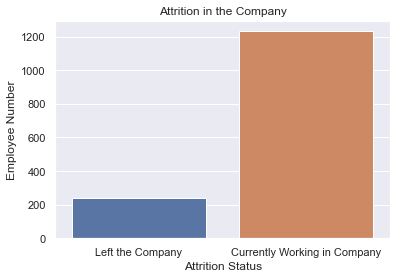

Currently Working in Company    1233
Left the Company                 237
Name: Attrition, dtype: int64

In [26]:
trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(trgt)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()
trgt.value_counts()

In the company, there are 1470 employees. 237 employees who compose 16% of the total number of employee left the company for some reasons. Besides that, 1233 employee is currently continuing to work in the same company.



# Features:
First of all, I will code two functions to implement dataframe and graph on each feature of the dataset.



In [27]:
# Create Feature Dataframe
def table_df(x): 
    """
    This function creates dataframe for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [28]:
# Create graph for each feature to compare its attrition in the company 

def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

In [29]:
# Labeling age groups
table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
df2['Age'] = pd.cut(df2['Age'], bins, labels = group_names)

In [30]:
# Age Group & Attrition Table
table_df(x = 'Age')


,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),41,22,53.658537,9.282700
1,(22-25),82,22,26.829268,9.282700
2,(26-35),606,116,19.141914,48.945148
3,(36-60),741,77,10.391363,32.489451


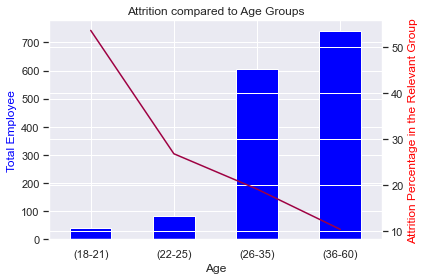

In [31]:
# Attrition Compared to Age Group Graph
graph_df(x='Age')

In 18-21 age group, young employees are more likely to leave the company. Their attrition proportion to their age group is approximately 53.7% (22 out of 41) and that makes up 9% of all attrition (22 out of 237).

If we evaluate overall attrition number in the company, 26-35 age group's attrition number is the highest comparing to other age groups. In this age group, we have 19.1 % of employee attrition(116 out 606). That makes up approximately 49% of all attrition in the company (116 out of 237).

35-60 age group generally prefers to secure their job in the same company.

# business Travel

In [32]:
#Business Travel & Attrition table
table_df(x="BusinessTravel")

,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


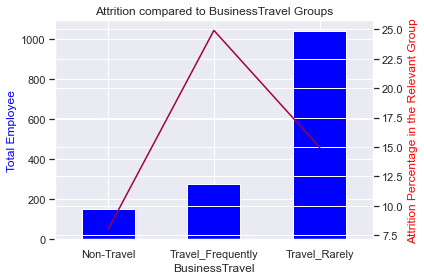

In [33]:
#attrition comparedb to business travel group graph
graph_df(x="BusinessTravel")

# Distance from home

In [34]:
table_df(x='DistanceFromHome')
BINS=  [0,3,6,10,29]
grop_name=['1-3,',"4-6","7-10","10+"]
df2['DistanceFromHome']= pd.cut(df2['DistanceFromHome'],bins,labels=group_names)


In [35]:
# Distance From Home Group & Attrition Table
table_df(x = 'DistanceFromHome')


,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),91,14,15.384615,5.907173
1,(22-25),99,29,29.292929,12.236287
2,(26-35),87,13,14.942529,5.485232
3,(36-60),0,0,NaN,0.000000


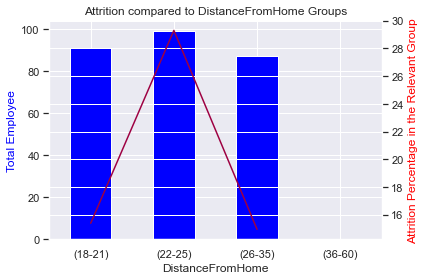

In [36]:
# Attrition compared to Distance From Home Graph
graph_df(x='DistanceFromHome')

Attrition rate within its own distance group seems to increase as the distance from home increases.

# Education

In [37]:
#LABELING EDUCATION LEVELS
table_df(x="Education")
df2['Education']=df2['Education'].map({1:"Below College", 2:'College',3:'Bachelor',4:"Master",5:"Doctor"})

In [38]:
#EDUCATION LEVEL & ATTRITION TABLE
table_df(x="Education")

,Education,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,572,99,17.307692,41.772152
1,Below College,170,31,18.235294,13.080169
2,College,282,44,15.602837,18.565401
3,Doctor,48,5,10.416667,2.109705
4,Master,398,58,14.572864,24.472574


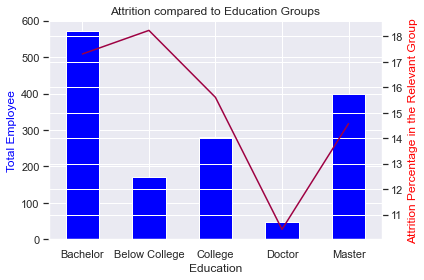

In [39]:
#Education level graph
graph_df(x="Education")

In [40]:
#EDUCATION FIELD & ATTRITION
table_df(x="EducationField")

,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


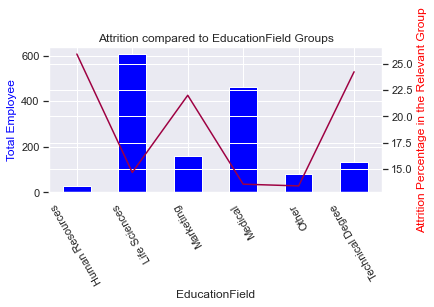

In [41]:
graph_df(x="EducationField" , z=120)

Employees who have Life Science education level have the most attrition number which makes up the 37.5% of all attrition (89 out of 237). But that composes only 14.7% of attrition within Life Sciences field.

Medical education level have the second highest attrition number which makes up the 13.57% of all attrition (63 out of 237). But that composes only 14.7% of attrition within Life Sciences field.

Besides that, Human Resources, Technical Degree, and Marketing fields are mostly affected by the attrition respectively. Their approximately 22-26% employees left the company.

# correlation matrix

<AxesSubplot:>

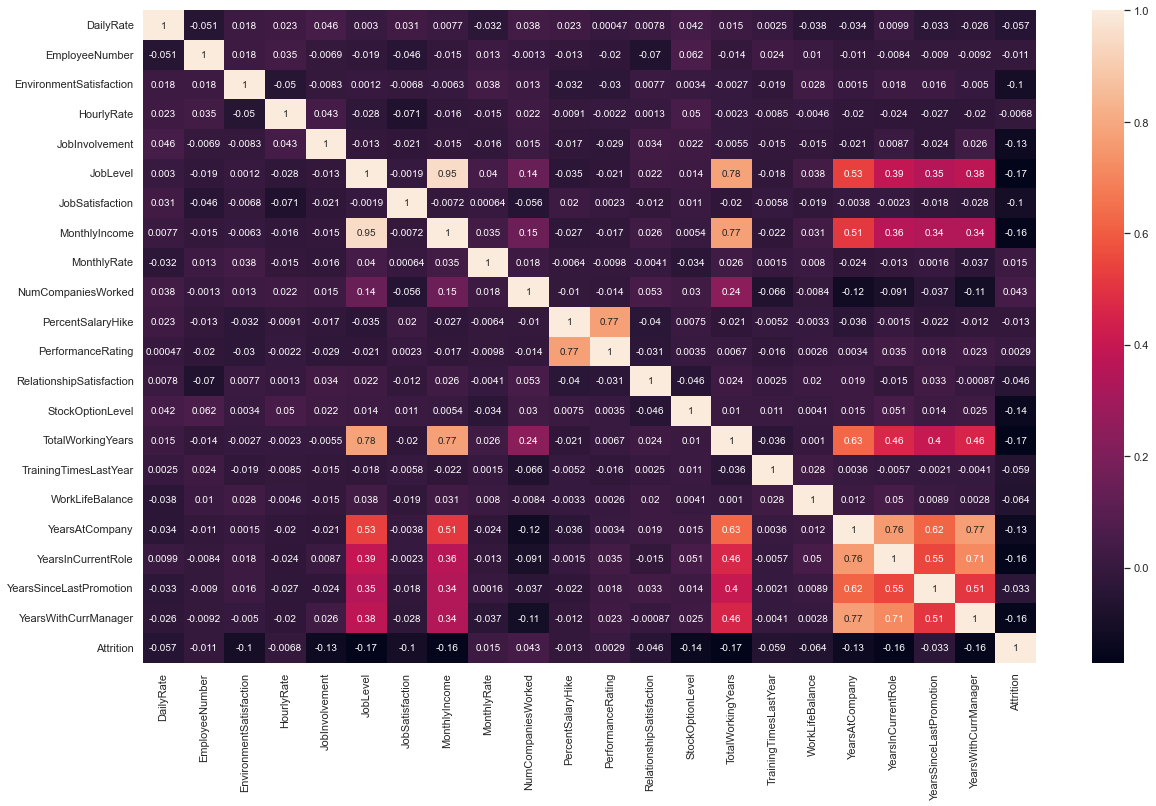

In [42]:
corr_matrix=df2.corr()
f, ax= plt. subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

# Hypothesis Testing (Examining Attrition in Gender throughout the company)

1. Selecting appropriate test

In [43]:
#gender and attrition table
table_df(x="Gender")

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


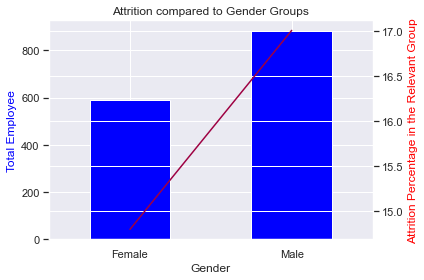

In [44]:
#attrition comapre to gender graph
graph_df(x="Gender")

# the frequentist statistical approach

In [45]:
# Assign female and  male into variables
female = df2[df2['Gender'] == 'Female']
male = df2[df2['Gender'] == 'Male']

# Find the mean for female and male employees attrition
female_attrition_mean = female['Attrition'].mean()
male_attrition_mean = male['Attrition'].mean()
print ('Female attrition mean: {}'.format(female_attrition_mean))
print ('Male attrition mean: {}'.format(male_attrition_mean))

# Find the difference of female and male employees attrition
diff_mean = male_attrition_mean - female_attrition_mean
print ('Difference of mean between male and female employees attrition: {}'.format(diff_mean))

Female attrition mean: 0.14795918367346939
Male attrition mean: 0.17006802721088435
Difference of mean between male and female employees attrition: 0.022108843537414963


# Z-SCORE

In [46]:
# Compute z-score
male_attrition = np.sum(male['Attrition'])
female_attrition = np.sum(female['Attrition'])
male_ln = len(male)
female_ln = len(female)            
phat = (male_attrition + female_attrition) / (male_ln + female_ln)
z = (diff_mean) / np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print ('z score:{}'.format(z))

z score:1.1292547809155016


# P-VALUE

In [47]:
p=stats.norm.cdf(-z)*2
print('p-value:{}'.format(p))

p-value:0.2587903704911598


In [48]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from scipy.stats import randint
from IPython.display import Image
from sklearn.model_selection import train_test_split


In [49]:
# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
#model selction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer

# Feature Engineering and Selection

 Decide what features we should keep.



In [51]:
df2.drop(['EmployeeNumber','PerformanceRating'], axis=1, inplace=True)

transform catogorical data into numerical

In [52]:
# Extract categorical features from dataset
cat_df=df2.select_dtypes(include="category")
cat_df.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'Gender'],
      dtype='object')

In [53]:
# Extract categorical features from dataset
num_df=df2.select_dtypes(include='int64')
num_df.columns

Index(['DailyRate', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

With that information, we can now encode the categorical data into a binary representation.

In [54]:
features_categorical=pd.get_dummies(cat_df, drop_first=True)
features_categorical.head()

,Age_(22-25),Age_(26-35),Age_(36-60),BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,DistanceFromHome_(22-25),DistanceFromHome_(26-35),DistanceFromHome_(36-60),EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male
0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1
3,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1


In [55]:
# concatenate the features
df3 = pd.concat([num_df, features_categorical], axis=1)
df3.head()


,DailyRate,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,Department_Sales,DistanceFromHome_(22-25),DistanceFromHome_(26-35),DistanceFromHome_(36-60),EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male
0,1102,2,94,3,2,4,5993,19479,8,11,...,1,0,0,0,1,0,0,0,0,0
1,279,3,61,2,2,2,5130,24907,1,23,...,0,0,0,0,1,0,0,0,0,1
2,1373,4,92,2,1,3,2090,2396,6,15,...,0,0,0,0,0,0,0,1,0,1
3,1392,4,56,3,1,3,2909,23159,1,11,...,0,0,0,0,1,0,0,0,0,0
4,591,1,40,3,1,2,3468,16632,9,12,...,0,0,0,0,0,0,1,0,0,1


In [56]:
# Moving Response Variable to the last column
response = df3['Attrition']
df3 = df3.drop(labels=['Attrition'], axis=1)
df3.insert(35,'Attrition',response)
df3.head()

,DailyRate,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,DistanceFromHome_(22-25),DistanceFromHome_(26-35),DistanceFromHome_(36-60),EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,Attrition
0,1102,2,94,3,2,4,5993,19479,8,11,...,0,0,0,1,0,0,0,0,0,1
1,279,3,61,2,2,2,5130,24907,1,23,...,0,0,0,1,0,0,0,0,1,0
2,1373,4,92,2,1,3,2090,2396,6,15,...,0,0,0,0,0,0,1,0,1,1
3,1392,4,56,3,1,3,2909,23159,1,11,...,0,0,0,1,0,0,0,0,0,0
4,591,1,40,3,1,2,3468,16632,9,12,...,0,0,0,0,0,1,0,0,1,0


# Data Preprocessing

In [57]:
X = df3.iloc[:, :-1].values   
y = df3.iloc[:, 35].values 

# Splitting the dataset into the Training set and Test set

In [58]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# feature scaling

In [59]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

# Principal Component Analysis



In [60]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.40410731e-01, 7.34147792e-02, 6.03570472e-02, 5.14111951e-02,
       4.73486664e-02, 3.80224837e-02, 3.60417806e-02, 3.38493929e-02,
       3.36978907e-02, 3.32548021e-02, 3.22388433e-02, 3.12878189e-02,
       3.07258906e-02, 2.99808450e-02, 2.92151832e-02, 2.87407473e-02,
       2.81416212e-02, 2.78576302e-02, 2.65182974e-02, 2.60913277e-02,
       2.56100026e-02, 2.44948539e-02, 2.36709855e-02, 2.12491671e-02,
       1.80622924e-02, 1.49667572e-02, 8.63423151e-03, 7.56698659e-03,
       6.36547350e-03, 4.41452791e-03, 3.18228224e-03, 1.41458484e-03,
       1.35205730e-03, 4.08823918e-04, 6.21917902e-34])

# Classification Functions for Machine Learning Algorithms
Classification Function with All Features

In [61]:
def classification_all_features(Model):
    """
    This function apply machine learning algorithms into the all features in the dataset and 
    returns confusion matrix and f1 score which will be used in models comparison.
    """
    
    # Separate response variable and features
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 35].values
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))
    
    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))
    

# Classification Function with Hyperparameter Tuning (all features)

In [62]:
def classification_pca_features(Model):
    """
    This function apply machine learning algorithms into the all PCA features and 
    returns confusion matrix and f1 score which will be used in models comparison.
    """
    
    # Separate response variable and features
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 35].values
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Extracting 27 features from PCA
    pca = PCA(n_components = 27)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train_pca, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test_pca)
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))
    
    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))


# Classification Function with Hyperparameter Tuning with PCA features

In [63]:
def classification_tuning_pca(regularizator):
    """
    This function apply hyperparameter tuning to machine learning algorithms with pca features and 
    returns best parameters, confusion matrix and f1 score which will be used in models comparison.
    """
    
    # Separate response variable and features
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 35].values
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Extracting 27 features from PCA
    pca = PCA(n_components = 27)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Hyperparameter with regularizator
    model_cv = regularizator
    
    # Fitting classifier to the Training set (all features)
    model_cv.fit(X_train_pca, y_train)
        # Predicting the Test set results
    y_pred = model_cv.predict(X_test_pca)
    
    global score 
    # Assign f1 score to a variable
    score = model_cv.score(X_test_pca, y_test)

    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

    # Printing Tuned Model Parameters
    print("Tuned Model Parameters: {}".format(model_cv.best_params_))

    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))



# Logistic Regression

In [64]:
classification_all_features(LogisticRegression(random_state = 0))

f1 score: 0.8287103620934798
[[301   9]
 [ 44  14]]


# Logistic Regression with Hyperparameter Tuning (all features)

In [65]:
classification_pca_features(LogisticRegression(random_state = 0))

f1 score: 0.8217538705512805
[[302   8]
 [ 46  12]]


# Decision Tree Classification


In [66]:
classification_all_features(DecisionTreeClassifier(criterion="gini",random_state=0))

f1 score: 0.7756358073009322
[[263  47]
 [ 38  20]]


In [67]:
# Assign f1 score to a variable for the model comparison
dtr1=score

# Random Forest Classification

In [68]:
classification_all_features(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))


f1 score: 0.7869186432819331
[[305   5]
 [ 54   4]]


In [69]:
# Random Forest Classification with PCA features
classification_pca_features(RandomForestClassifier(random_state=0))

f1 score: 0.7993255046583851
[[309   1]
 [ 53   5]]


# K-NN Classification

In [70]:
classification_all_features(KNeighborsClassifier())

f1 score: 0.7907187710492579
[[304   6]
 [ 53   5]]


# K-NN with Hyperparameter Tuning (PCA features)

In [71]:
# Setting up parameters
param_grid={'n_neighbors': np.arange(1, 50)}

classification_tuning_pca(GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring = 'f1_weighted'))

f1 score: 0.7738167905457255
Tuned Model Parameters: {'n_neighbors': 3}
[[297  13]
 [ 54   4]]


# thank you👍